# Transforming Random Variables

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

### Functions of a random variable

A transformation of a random variable is also a random variable.  If $X$ is a random variable and $g$ is function, define a new random variable $Y=g(X)$ in Symbulate using the `.apply()` method, e.g. `Y = X.apply(g)`.  An `RV` defined via a transformation of another `RV` behaves like any Symbulate `RV`.

Note that for arithmetic operations and many math functions (such as `exp`, `log`, `sin`) you can simply call `g(X)` rather than `X.apply(g)`.  User-defined functions can also be used to define or transform random variables.

*Example.* If $X$ has a normal distribution, then $e^X$ has a *lognormal* distribution.

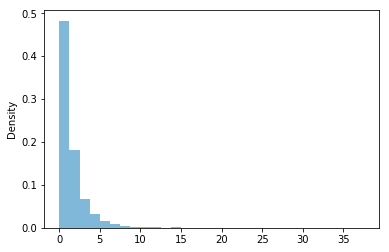

In [15]:
X = RV(Normal(mean=0, var=1))
Y = exp(X) # same as X.apply(exp)
Y.sim(10000).plot()

*Example.* If $U$ has a Uniform(0,1) distribution then $-\log(1-U)$ has an Exponential(1) distribution.

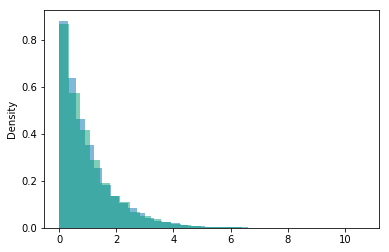

In [16]:
U = RV(Uniform(a=0, b=1))
X = -log(1 - U)
X.sim(10000).plot(alpha=0.5)
RV(Exponential(1)).sim(10000).plot(alpha=0.5)

*Example.* A user defined function with `.apply()`

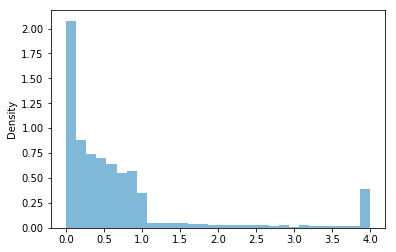

In [17]:
def g(x):
    return min(abs(x - 1), 2)**2

X = RV(Exponential(rate = 1))
Y = X.apply(g)
Y.sim(10000).plot()

### Transformations of multiple RVs

We can also transform variables with a function of two RVs. In order to do this in the probability world we need to define our two variables on the same probability space. This must be done so that symbulate knows the relationship between two varaibles. For example, The following code will throw an error:

```
X = RV(Binomial(5,.5))
Y = RV(Poisson(1))
Z = X+Y
```


While it may make sense to us to add values of these two random variables because we assume independence, there is no way for Symbulate to know that is what we are doing. Instead the following works nicely:

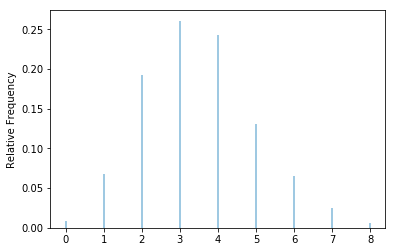

In [19]:
X, Y = RV(Binomial(5,.5)* Poisson(1))
Z = X+Y
Z.sim(1000).plot()

Sometimes we are only able to perform the transformation we want by using the `apply` function. 

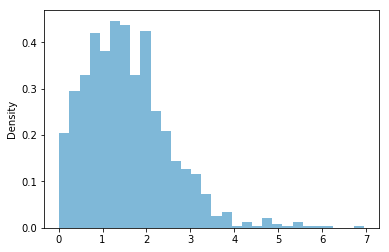

In [20]:
X, Y = RV(Exponential(1)* Normal(1,1))
R = (X & Y).sim(1000).apply(max)
R.plot()

Note that the above code does a few things. First we define X and Y as two independent variables. We then simulate 1000 X,Y pairs and finally apply the `max` function to each pair in the vector, and lastly plot these values.

Note that similarly we could define our own function to apply to a vector of groups of values. 